In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
df = pd.read_csv("/content/data.csv",sep=";", decimal=",")
df.head()

,day,screen_time,evening_screen,social_media,productivity_and_others,sleep,mood,stress,focus,productivity_level,evening_screen_ratio,social_media_ratio
0,1.0,7.25,3.0,5.25,2.00,7.5,4.0,3.0,2.0,4.05,0.41,0.72
1,2.0,5.75,2.0,3.50,2.00,8.5,4.0,3.0,3.0,4.85,0.35,0.61
2,3.0,4.75,1.5,2.75,2.00,9.0,3.0,4.0,4.0,5.30,0.32,0.58
3,4.0,8.75,2.0,5.00,3.75,8.0,3.0,4.0,1.0,3.50,0.23,0.57
4,5.0,5.75,1.5,3.25,2.50,8.0,3.0,5.0,4.0,5.00,0.26,0.57


In [6]:
for col in df.columns:
  df[col]=  df[col].astype(str).str.replace(",", ".").astype(float) #change the commas in the file to . to make them float numbers

In [ ]:
df.isna().sum()

In [7]:
#calculating derived variables
df["productivity_score"]= (df["focus"]* 0.5+ df["sleep"]*0.3+ df["mood"]*0.2)
df["evening_screen_ratio"]= df["evening_screen"]/df["screen_time"]
df["social_media_ratio"]= df["social_media"]/ df["screen_time"]


In [8]:
#summary statistics
df.describe()

,day,screen_time,evening_screen,social_media,productivity_and_others,sleep,mood,stress,focus,productivity_level,evening_screen_ratio,social_media_ratio,productivity_score
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,5.892857,1.625000,3.866071,2.017857,7.875000,3.821429,3.785714,3.714286,4.983929,0.272526,0.649394,4.983929
std,8.225975,1.347887,0.702179,1.236936,0.690305,0.647288,0.818923,0.994695,1.181874,0.604314,0.088213,0.113295,0.604314
min,1.000000,3.750000,0.500000,1.750000,0.500000,7.000000,2.000000,1.000000,1.000000,3.500000,0.083333,0.461538,3.500000
25%,7.750000,5.000000,1.000000,3.000000,1.500000,7.500000,3.000000,3.000000,3.000000,4.700000,0.210714,0.569876,4.700000
50%,14.500000,5.750000,1.500000,3.500000,2.000000,8.000000,4.000000,4.000000,4.000000,5.050000,0.279221,0.651515,5.050000
75%,21.250000,6.625000,2.000000,5.000000,2.000000,8.500000,4.000000,4.250000,5.000000,5.312500,0.333333,0.732955,5.312500
max,28.000000,9.500000,3.500000,7.500000,3.750000,9.000000,5.000000,5.000000,5.000000,6.050000,0.454545,0.875000,6.050000


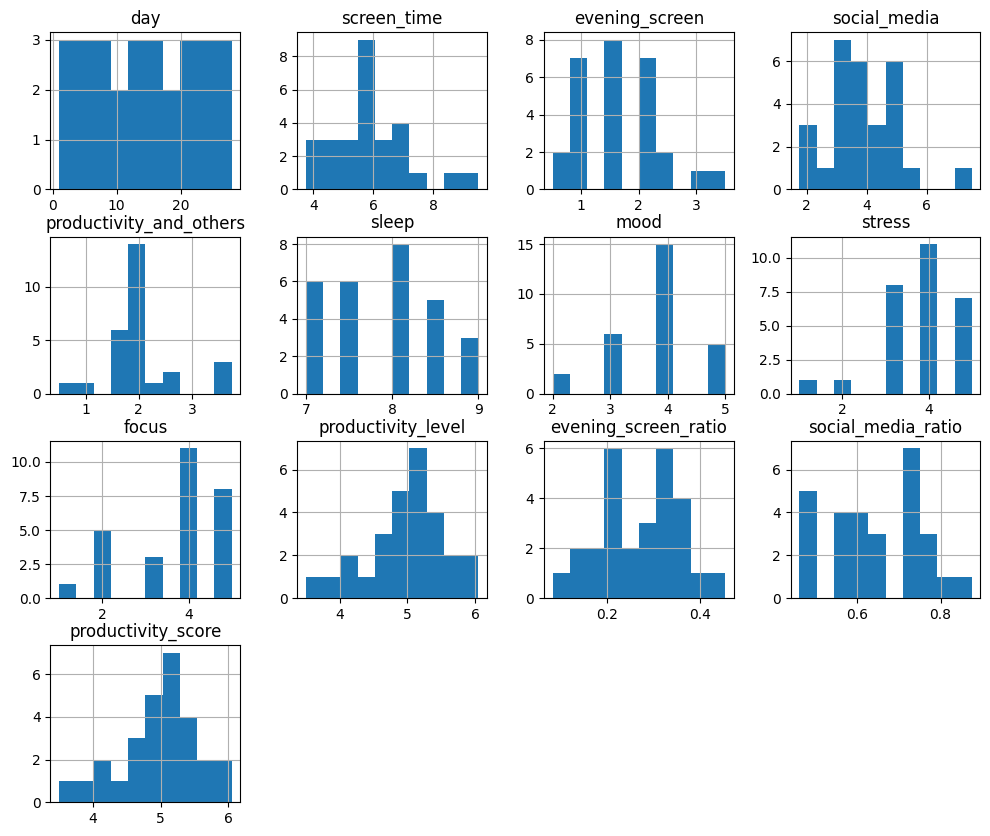

In [9]:
#EDA
df.hist(figsize=(12,10))
plt.show()

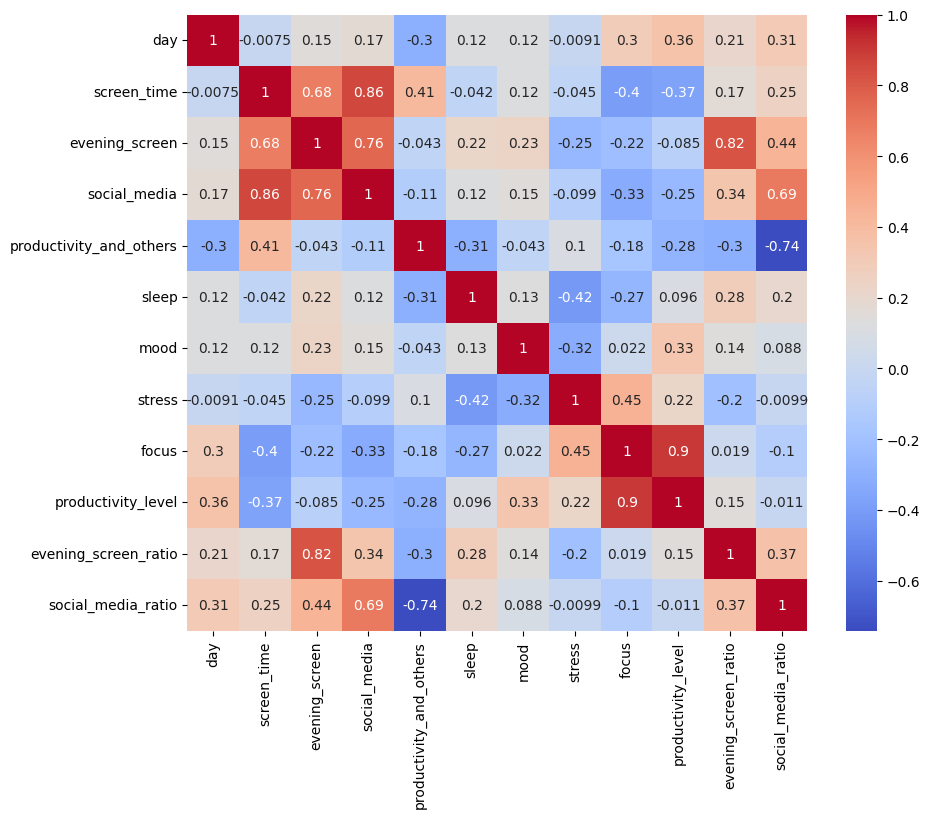

In [13]:
##correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

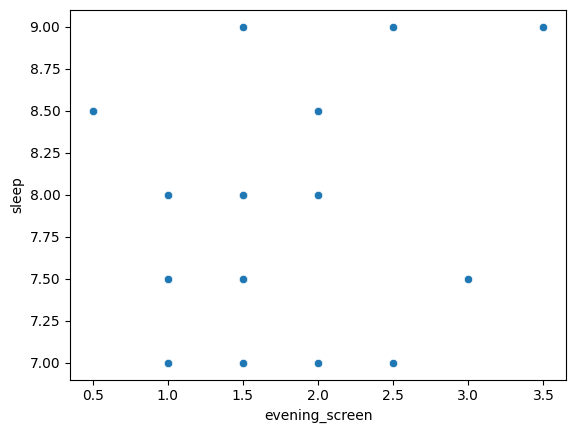

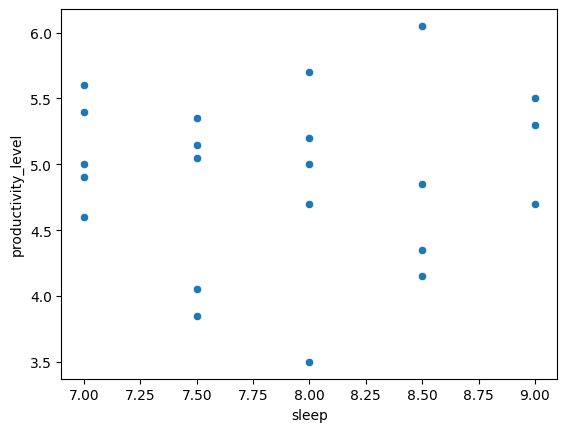

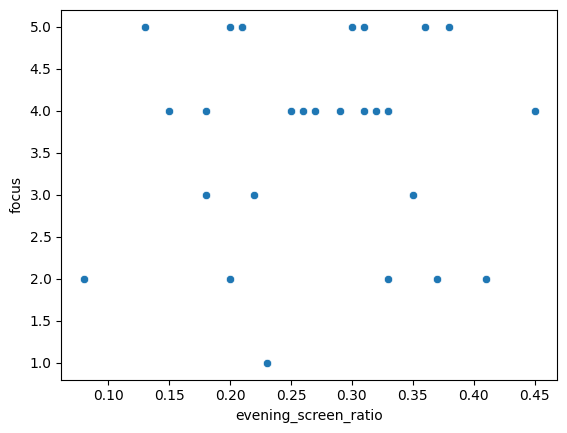

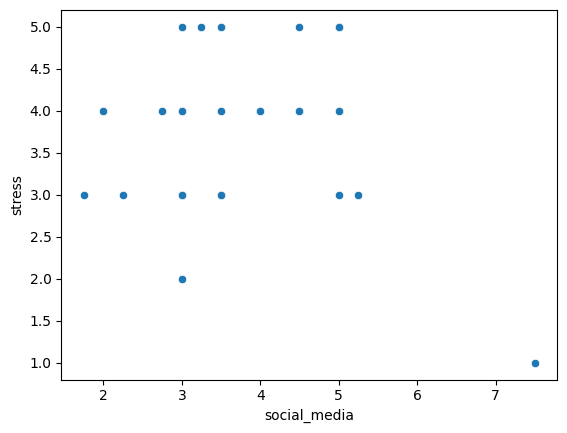

In [15]:
#scatter plots
#for H1
sns.scatterplot(data=df, x="evening_screen", y="sleep")
plt.show()

#for H2
sns.scatterplot(data=df, x="sleep", y="productivity_level")
plt.show()

#forH3
sns.scatterplot(data=df, x="evening_screen_ratio", y="focus")
plt.show()

#for H4
sns.scatterplot(data=df, x="social_media", y="stress")
plt.show()

In [16]:
#hypothesis testing

#for H1
pearsonr(df["evening_screen"], df["sleep"])

#for H2
pearsonr(df["sleep"], df["productivity_level"])

#forH3
pearsonr(df["evening_screen_ratio"],df["focus"] )


#for H4
pearsonr(df["social_media"], df["stress"])

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))